In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

Loading Dataset

In [ ]:
file_path = "https://raw.githubusercontent.com/dorsa-asgari/finalproject/main/Dry_Bean.csv"

dataset = pd.read_csv(file_path)


In [ ]:
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,0,1,2,3,4,5,6
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.003564,0.909851,0.998430,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,...,0.001852,0.668237,0.995222,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Dropping missing values and Showing Descritptive information
**TASK 1**

In [ ]:
dataset.dropna(inplace=True)
description = dataset.describe()
description.loc['sum'] = dataset.sum()
description

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,1.361100e+04,1.361100e+04,1.361100e+04,1.361100e+04,13611.000000,13611.000000,1.361100e+04,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,5.304828e+04,8.552835e+02,3.201419e+02,2.022707e+02,1.583242,0.750895,5.376820e+04,2.530642e+02,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,2.932410e+04,2.142897e+02,8.569419e+01,4.497009e+01,0.246678,0.092002,2.977492e+04,5.917712e+01,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,2.042000e+04,5.247360e+02,1.836012e+02,1.225127e+02,1.024868,0.218951,2.068400e+04,1.612438e+02,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3.632800e+04,7.035235e+02,2.533036e+02,1.758482e+02,1.432307,0.715928,3.671450e+04,2.150680e+02,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,4.465200e+04,7.949410e+02,2.968834e+02,1.924317e+02,1.551124,0.764441,4.517800e+04,2.384380e+02,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,6.133200e+04,9.772130e+02,3.764950e+02,2.170317e+02,1.707109,0.810466,6.229400e+04,2.794465e+02,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,2.546160e+05,1.985370e+03,7.388602e+02,4.601985e+02,2.430306,0.911423,2.632610e+05,5.693744e+02,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733
sum,7.220402e+08,1.164126e+07,4.357451e+06,2.753107e+06,21549.506576,10220.430884,7.318390e+08,3.444457e+06,10204.612969,13436.001244,11886.239006,10886.944574,89.337275,23.355759,8759.905958,13543.806737


TASK 2: Making correlation Matrix and calculation pairwise Correlation

In [ ]:
new_dataset = dataset[dataset.columns[0:len(dataset.columns)-1]]
corr_matrix = new_dataset.corr(method='pearson', min_periods=1, numeric_only=False)
selected_features = corr_matrix.where(corr_matrix > 0.8).stack()
df = selected_features.reset_index()

df

,level_0,level_1,0
0,Area,Area,1.000000
1,Area,Perimeter,0.966722
2,Area,MajorAxisLength,0.931834
3,Area,MinorAxisLength,0.951602
4,Area,ConvexArea,0.999939
5,Area,EquivDiameter,0.984968
6,Perimeter,Area,0.966722
7,Perimeter,Perimeter,1.000000
8,Perimeter,MajorAxisLength,0.977338
9,Perimeter,MinorAxisLength,0.913179


Building the largest set of features that have pairwise correlation of greater than 0.8

In [ ]:
def corr_finder(df):
  features = []
  for i in range(len(df)):
    if df.iloc[i,0] not in features:
      features.append(df.iloc[i,0])

  corrs = sorted([list(df[df.iloc[:, 0] == item].iloc[:,1].values) for item in features], key=len, reverse=True)

  return corrs


In [ ]:
co = corr_finder(df)[0]
co

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'ConvexArea',
 'EquivDiameter']

In [ ]:
features = dataset[corr_finder(df)[0]]
features_corr_matrix = features.corr()
features_corr_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter
Area,1.000000,0.966722,0.931834,0.951602,0.999939,0.984968
Perimeter,0.966722,1.000000,0.977338,0.913179,0.967689,0.991380
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.932607,0.961733
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,0.951339,0.948539
ConvexArea,0.999939,0.967689,0.932607,0.951339,1.000000,0.985226
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.985226,1.000000


Task 3: Plotting Heatmap of correlation matrix

In [ ]:
corr_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


<Axes: >

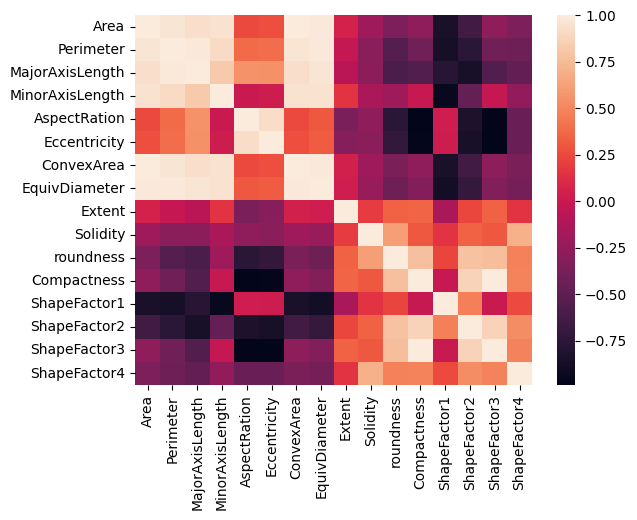

In [ ]:
sns.heatmap(corr_matrix)

TASK 4

Encoding and joining to the real dataframe

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(dataset[['Class']]).toarray())
dataset = dataset.join(encoder_df)
dataset = dataset.drop(['Class'], axis=1)
dataset

In [ ]:
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,...,ShapeFactor2,ShapeFactor3,ShapeFactor4,0,1,2,3,4,5,6
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,...,0.003147,0.834222,0.998724,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,...,0.003564,0.909851,0.998430,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,...,0.003048,0.825871,0.999066,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,...,0.003215,0.861794,0.994199,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,...,0.003665,0.941900,0.999166,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,...,0.001749,0.642988,0.998385,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,...,0.001886,0.676099,0.998219,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,...,0.001888,0.676884,0.996767,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,...,0.001852,0.668237,0.995222,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
class KMeans:
  def __init__(self, k):
    self.k = k

  def fit(self, X):
    self.centroids = self._initialize_centroids(X)

    while True:
      # Assign each point to the closest centroid
      clusters = self._create_clusters(X)

      # Update the centroids of each cluster
      old_centroids = self.centroids
      self.centroids = self._calculate_centroids(clusters, X)

      # Check if the centroids have converged
      if self._has_converged(old_centroids, self.centroids):
        break

    return clusters

  def _initialize_centroids(self, X):
    # Select k random points as the initial centroids
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], self.k, replace=False)
    return X[indices]

  def _create_clusters(self, X):
    # Assign each point to the closest centroid
    clusters = [[] for _ in range(self.k)]
    for i in range(X.shape[0]):
      distances = [self._euclidean_distance(X[i], c) for c in self.centroids]
      closest_centroid = np.argmin(distances)
      clusters[closest_centroid].append(i)
    return clusters

  def _calculate_centroids(self, clusters, X):
    # Update the centroids of each cluster     # centroids = [1 , 4 , 7 , 9, 3]
    centroids = np.zeros((self.k, X.shape[1])) #[[],[1,24,5,2,1],[,14,,6,8,1,],[,1223],[]]
    for i, cluster in enumerate(clusters):
      if len(cluster) == 0:
        # If a cluster is empty, leave its centroid unchanged
        centroids[i] = self.centroids[i]
      else:
        centroids[i] = np.mean(X[cluster], axis=0)
    return centroids

  def _has_converged(self, old_centroids, centroids):
    # Check if the centroids have converged
    return (np.linalg.norm(old_centroids - centroids) < 0.1)

  def _euclidean_distance(self, a, b):
    # Calculate the Euclidean distance between two points
    return math.sqrt(np.sum((a - b) ** 2))

kmeans = KMeans(k=5)
clusters = kmeans.fit(dataset.values)


In [ ]:
clusters

[[2720,
  2728,
  2729,
  2731,
  2732,
  2734,
  2735,
  2736,
  2737,
  2738,
  2739,
  2740,
  2741,
  2742,
  2743,
  2744,
  2745,
  2746,
  2747,
  2748,
  2749,
  2750,
  2751,
  2752,
  2753,
  2754,
  2755,
  2756,
  2757,
  2758,
  2759,
  2760,
  2761,
  2762,
  2763,
  2764,
  2765,
  2766,
  2767,
  2768,
  2769,
  2770,
  2771,
  2772,
  2773,
  2774,
  2775,
  2776,
  2777,
  2778,
  2779,
  2780,
  2781,
  2782,
  2783,
  2784,
  2785,
  2786,
  2787,
  2788,
  2789,
  2790,
  2791,
  2792,
  2793,
  2794,
  2795,
  2796,
  2797,
  2798,
  2799,
  2800,
  2801,
  2802,
  2803,
  2804,
  2805,
  2806,
  2807,
  2808,
  2809,
  2810,
  2811,
  2812,
  2813,
  2814,
  2815,
  2816,
  2817,
  2818,
  2819,
  2820,
  2821,
  2822,
  2823,
  2824,
  2825,
  2826,
  2827,
  2828,
  2829,
  2830,
  2831,
  2832,
  2833,
  2834,
  2835,
  2836,
  2837,
  2838,
  2839,
  2840,
  2841,
  2842,
  2843,
  2844,
  2845,
  2846,
  2847,
  2848,
  2849,
  2850,
  2851,
  2852,
  2853,


In [ ]:
pca = PCA(n_components=2)

pca_features = pca.fit_transform(StandardScaler().fit_transform(dataset.values))

In [ ]:
pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-5.097523,2.312828
1,-5.524814,3.324155
2,-4.885631,2.309529
3,-4.457601,2.492119
4,-6.381750,4.359679
...,...,...
13606,-1.400467,-0.602122
13607,-1.848988,0.231890
13608,-1.674769,-0.075400
13609,-1.391078,-0.387998


In [ ]:
new_clusters = [pca_df.loc[i] for i in clusters] # [[2720,2722,2739],[5685,1273],[1923,1231,11111],[9883,821,5,6],[22,33]]     new_cluster = [[[-1.400467,-0.602122]],[1.674769	-0.075400],[],[],[]]
new_clusters

[           PC1       PC2
 2720  3.527856 -0.284842
 2728  3.898489 -0.909876
 2729  3.076341  0.175824
 2731  4.037424 -0.973813
 2732  2.279672  1.165966
 ...        ...       ...
 7424  3.978454 -1.976781
 7425  4.339558 -2.336925
 7426  4.552630 -2.107555
 7427  4.429685 -2.730946
 7428  4.462574 -1.522448
 
 [1791 rows x 2 columns],
             PC1       PC2
 3352   5.701097  5.028854
 3353   4.955936  6.089620
 3354   5.279843  5.765996
 3355   5.472684  5.706292
 3356   6.297433  4.793109
 ...         ...       ...
 3866  12.078078  7.159411
 3867  11.729363  7.945513
 3868  11.359982  8.786440
 3869  12.223211  8.399662
 3870  13.398447  7.834195
 
 [519 rows x 2 columns],
             PC1       PC2
 2002  -1.829052  2.852406
 2003  -2.297496  3.703957
 2004  -2.952828  4.402336
 2005  -2.913831  4.352653
 2006  -2.523386  4.038757
 ...         ...       ...
 10060  1.868275 -1.260325
 10061  0.742243 -0.045827
 10062  2.502579 -2.188792
 10063  1.274892 -0.191760
 10064  2.87

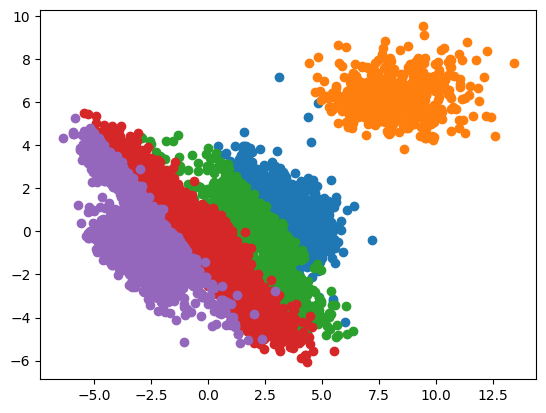

In [ ]:
for cls in new_clusters:
  plt.scatter(cls['PC1'],cls["PC2"])
plt.show()